In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset de diabetes
diabetes = load_diabetes()
print(load_diabetes()["DESCR"])
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# Agregar la columna objetivo
df['y'] = diabetes.target
print("Dataset:")
#print(df.head())
df

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0



X:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

y:
   target
0   151.0
1    75.0
2   141.0
3   206.0
4   135.0

Dimensiones de X y y:
(442, 10)
(442,)

Dimensión de X después de seleccionar la tercera característica:
(442,)

Dimensión de X después del reshape:
(442, 1)


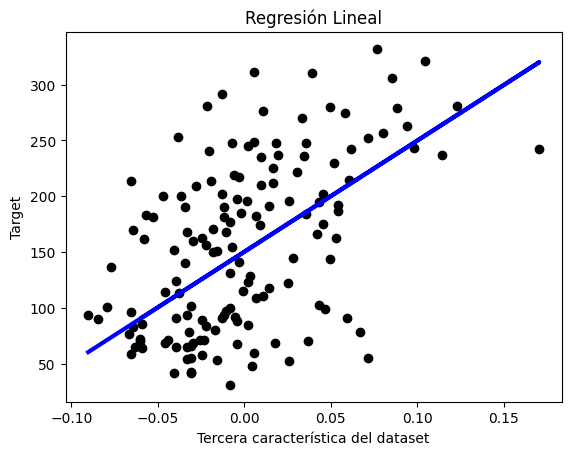

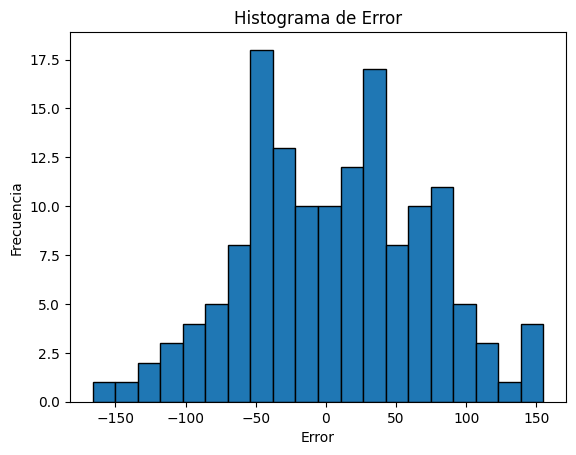

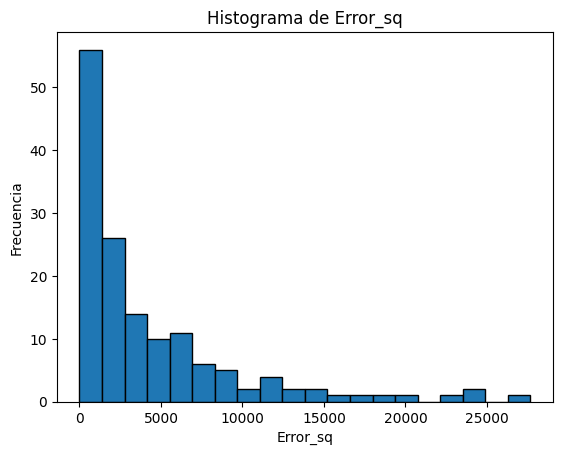

In [ ]:
# Convertir datos y valores objetivo a DataFrames
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.DataFrame(diabetes.target, columns=["target"])

# Imprimir los DataFrames
print()
print("X:")
print(X.head())
print("\ny:")
print(y.head())

# Seleccionar los datos y valores objetivo
(X, y) = datasets.load_diabetes(return_X_y=True)
print("\nDimensiones de X y y:")
print(X.shape)
print(y.shape)

# Seleccionar la tercera característica
X = X[:, 2]
print("\nDimensión de X después de seleccionar la tercera característica:")
print(X.shape)

# Reshape para obtener una matriz 2D
X = X.reshape(-1, 1)
print("\nDimensión de X después del reshape:")
print(X.shape)

# Dividir los datos en entrenamiento y prueba
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y, test_size=0.33)

# Entrenar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Predecir valores
y_pred = model.predict(X_test)

# Visualizar los resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Tercera característica del dataset')
plt.ylabel('Target')
plt.title('Regresión Lineal')
plt.show()

# Calcular los errores
error = y_test - y_pred
error_abs = abs(y_test - y_pred)
error_sq = (y_test - y_pred)**2

# Mostrar el histograma de los errores
plt.hist(error, bins=20, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Histograma de Error')
plt.show()

# Mostrar el histograma de los error_sq
plt.hist(error_sq, bins=20, edgecolor='black')
plt.xlabel('Error_sq')
plt.ylabel('Frecuencia')
plt.title('Histograma de Error_sq')
plt.show()

In [ ]:
# Evaluar el modelo
# y_test, y_pred son arreglos
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

Error Cuadrático Medio (MSE): 4324.475422010208
Raíz del Error Cuadrático Medio (RMSE): 65.76074377628501
Coeficiente de Determinación (R^2): 0.2512441368487536
